In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('pupils-ex.csv')
df

,Name,Age,Country,Height,Weight,avg,income,rooms,family,type,gen
0,adar,6,SP,113.0,30,70,16700,7,6,1,M
1,agam,6,GR,172.0,71,92,9200,5,4,2,F
2,avi,7,NaN,143.0,58,82,12000,3,7,1,M
3,dani,7,US,NaN,70,90,15000,4,4,2,M
4,dina,7,ISR,110.0,26,64,10000,6,8,1,F
5,efrat,7,NaN,115.0,33,75,8000,5,5,3,F
6,ehud,8,ISR,155.0,66,85,18000,2,7,1,M
7,eli,8,NaN,155.0,61,84,8900,7,10,2,M
8,ester,8,ISR,NaN,48,79,19600,2,4,1,F
9,evyatar,8,NaN,110.0,34,72,7600,3,4,1,M


# 2 שיטות לזיהוי ערכים חסרים

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
Name       30 non-null object
Age        30 non-null int64
Country    21 non-null object
Height     24 non-null float64
Weight     30 non-null int64
avg        30 non-null int64
income     30 non-null int64
rooms      30 non-null int64
family     30 non-null int64
type       30 non-null int64
gen        30 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 2.7+ KB


In [4]:
df.isna().sum()

Name       0
Age        0
Country    9
Height     6
Weight     0
avg        0
income     0
rooms      0
family     0
type       0
gen        0
dtype: int64

In [5]:
df.Height.mean()

139.125

In [6]:
df.Height.fillna(df.Height.mean(),inplace=True)

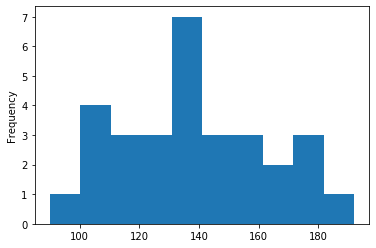

In [7]:
df.Height.plot.hist()

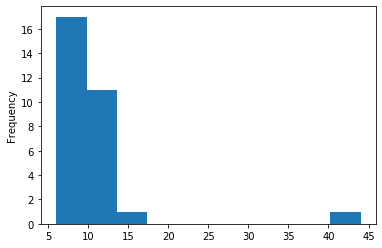

In [8]:
df.Age.plot.hist()

In [9]:
df.loc[df.Age > 12,'Age'] = 12

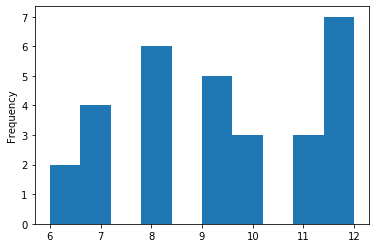

In [10]:
df.Age.plot.hist()

In [11]:
df.isna().sum()

Name       0
Age        0
Country    9
Height     0
Weight     0
avg        0
income     0
rooms      0
family     0
type       0
gen        0
dtype: int64

In [12]:
# Alterntive for fill null - by some formulas
df.loc[df.Height.isnull(),'Height'] = df.Age*12

In [13]:
ls = [2,4,6,8,10]*10


In [14]:
# skip
# ls = [2,4,6,8,10]*10
# for k,v in df.iterrows():
#    if np.isnan(v.Height):
#            df.loc[k,'Height'] = ls[v.Age]

In [15]:
df.drop(df.loc[df.Age <= 8].index,inplace=True)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18.0,10.666667,1.283378,9.0,9.25,11.000,12.00,12.0
Height,18.0,142.805556,25.974401,90.0,128.00,139.125,161.25,192.0
Weight,18.0,53.500000,18.974441,27.0,37.00,53.000,66.25,90.0
avg,18.0,81.500000,7.532283,68.0,75.00,82.000,86.75,94.0
income,18.0,23716.666667,13463.643856,8000.0,12800.00,19650.000,33375.00,54100.0
rooms,18.0,4.611111,1.377931,2.0,4.00,5.000,5.75,7.0
family,18.0,5.777778,1.664705,3.0,5.00,6.000,7.00,8.0
type,18.0,2.055556,0.872604,1.0,1.00,2.000,3.00,3.0


In [17]:
df.drop(['type'],axis=1,inplace=True)
df.head()

,Name,Age,Country,Height,Weight,avg,income,rooms,family,gen
12,lilach,9,ISR,192.000,88,94,23000,5,6,F
13,mia,9,NaN,139.125,49,82,12800,4,5,F
14,michal,9,US,132.000,53,79,20400,5,7,F
15,moshe,9,GR,128.000,43,80,42000,6,5,M
16,noya,9,SP,90.000,27,68,18200,6,5,F


In [18]:
df['gen'].replace({'M':1 , 'F':2},inplace=True)
df

,Name,Age,Country,Height,Weight,avg,income,rooms,family,gen
12,lilach,9,ISR,192.000,88,94,23000,5,6,2
13,mia,9,NaN,139.125,49,82,12800,4,5,2
14,michal,9,US,132.000,53,79,20400,5,7,2
15,moshe,9,GR,128.000,43,80,42000,6,5,1
16,noya,9,SP,90.000,27,68,18200,6,5,2
17,ofer,10,NaN,139.125,34,71,9300,4,8,1
18,ohad,10,ISR,159.000,64,83,12700,4,8,1
19,omer,10,US,162.000,68,87,34500,6,8,2
20,orit,12,US,123.000,40,78,18900,3,7,2
21,orit,11,NaN,175.000,73,89,54100,4,3,2


In [19]:
df['namelen']=df.Name.apply(len)
df.head()

,Name,Age,Country,Height,Weight,avg,income,rooms,family,gen,namelen
12,lilach,9,ISR,192.000,88,94,23000,5,6,2,6
13,mia,9,NaN,139.125,49,82,12800,4,5,2,3
14,michal,9,US,132.000,53,79,20400,5,7,2,6
15,moshe,9,GR,128.000,43,80,42000,6,5,1,5
16,noya,9,SP,90.000,27,68,18200,6,5,2,4


In [20]:
def myop(inc):
    if inc < 10000:
        return 1
    else:
        if inc < 30000:
            return 2
        else:
            return 3

In [21]:
df['new_inc'] = df.income.apply(myop)

In [22]:
df.head()

,Name,Age,Country,Height,Weight,avg,income,rooms,family,gen,namelen,new_inc
12,lilach,9,ISR,192.000,88,94,23000,5,6,2,6,2
13,mia,9,NaN,139.125,49,82,12800,4,5,2,3,2
14,michal,9,US,132.000,53,79,20400,5,7,2,6,2
15,moshe,9,GR,128.000,43,80,42000,6,5,1,5,3
16,noya,9,SP,90.000,27,68,18200,6,5,2,4,2


In [23]:
df.new_inc.value_counts()

2    10
3     6
1     2
Name: new_inc, dtype: int64

In [24]:
df['new_inc3'] = df.income.apply(lambda x: x>20000)
df.head()

,Name,Age,Country,Height,Weight,avg,income,rooms,family,gen,namelen,new_inc,new_inc3
12,lilach,9,ISR,192.000,88,94,23000,5,6,2,6,2,True
13,mia,9,NaN,139.125,49,82,12800,4,5,2,3,2,False
14,michal,9,US,132.000,53,79,20400,5,7,2,6,2,True
15,moshe,9,GR,128.000,43,80,42000,6,5,1,5,3,True
16,noya,9,SP,90.000,27,68,18200,6,5,2,4,2,False


In [25]:
df['new_inc4'] = df.income.apply(lambda x : 999 if x > 20000 else 888)
df.head()

,Name,Age,Country,Height,Weight,avg,income,rooms,family,gen,namelen,new_inc,new_inc3,new_inc4
12,lilach,9,ISR,192.000,88,94,23000,5,6,2,6,2,True,999
13,mia,9,NaN,139.125,49,82,12800,4,5,2,3,2,False,888
14,michal,9,US,132.000,53,79,20400,5,7,2,6,2,True,999
15,moshe,9,GR,128.000,43,80,42000,6,5,1,5,3,True,999
16,noya,9,SP,90.000,27,68,18200,6,5,2,4,2,False,888


In [26]:
def myop(inc):
    if inc < 10000:
        return 1
    else:
        if inc < 30000:
            return 2
        else:
            return 3

In [27]:
df['new_inc5'] = df.income.apply(lambda x : 1 if x < 10000 else 2 if x < 30000 else 3)

In [28]:
##########################
# check the binning:
# hist on income vs. count plot on new_inc
# use sb plot (displot and countplot) and pandas plot (hist and bar)

# איך עושים ב- Panadas

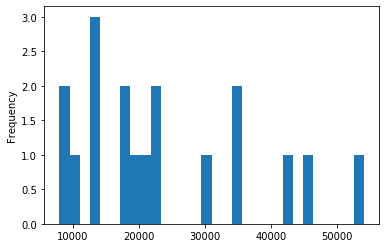

In [29]:
df.income.plot.hist(bins=30)

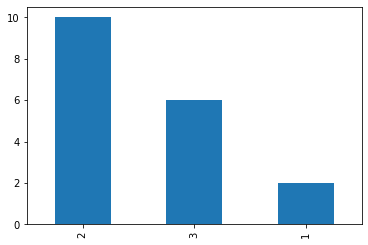

In [30]:
df.new_inc.value_counts().plot.bar()

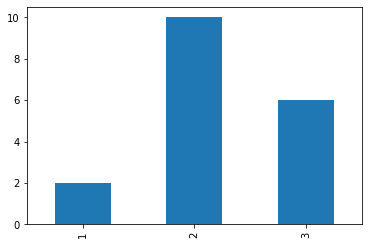

In [31]:
df.new_inc.value_counts().sort_index().plot.bar()

# איך עושים ב- Seaborn

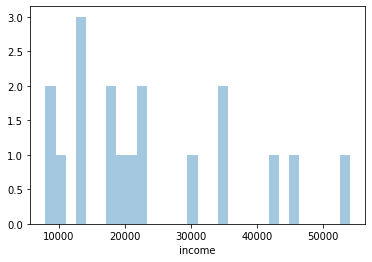

In [32]:
import seaborn as sb
sb.distplot(df.income, bins=30, kde=False)

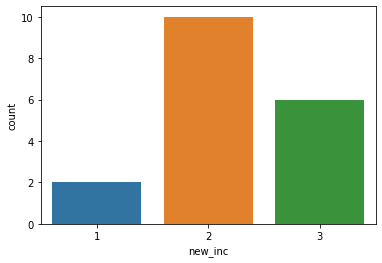

In [33]:
import seaborn as sb
sb.countplot(df.new_inc)

In [34]:
# Feature engineering

In [35]:
def myop2(r):
    print("=====",r.Age , r.income)
    return r.Age*r.income

In [36]:
df['new2'] = df.apply(myop2,axis=1)

===== 9 23000
===== 9 12800
===== 9 20400
===== 9 42000
===== 9 18200
===== 10 9300
===== 10 12700
===== 10 34500
===== 12 18900
===== 11 54100
===== 11 30000
===== 11 8000
===== 12 10900
===== 12 45000
===== 12 35000
===== 12 12800
===== 12 17300
===== 12 22000


In [37]:
list(df.Height)

[192.0,
 139.125,
 132.0,
 128.0,
 90.0,
 139.125,
 159.0,
 162.0,
 123.0,
 175.0,
 139.125,
 148.0,
 167.0,
 128.0,
 139.125,
 180.0,
 120.0,
 110.0]

In [38]:
# right bin edge
# try with right=False (look in documantation)
np.digitize(df.Height, [110,130,150,160], right=True)

array([4, 2, 2, 1, 0, 2, 3, 4, 1, 4, 2, 2, 4, 1, 2, 4, 1, 0], dtype=int64)

In [39]:
# right bin edge
# try with right=False (look in documantation)
np.digitize(df.Height, [110,130,150,160], right=False)

array([4, 2, 2, 1, 0, 2, 3, 4, 1, 4, 2, 2, 4, 1, 2, 4, 1, 1], dtype=int64)

In [40]:
df.gen.head()

12    2
13    2
14    2
15    1
16    2
Name: gen, dtype: int64

In [41]:
pd.get_dummies(df.gen).head()

,1,2
12,0,1
13,0,1
14,0,1
15,1,0
16,0,1


In [42]:
pd.get_dummies(df.gen, drop_first=True).head()

,2
12,1
13,1
14,1
15,0
16,1


In [43]:
# by range/4
pd.cut(df.Height,bins=3,labels=['S','M','L'])

12    L
13    M
14    M
15    M
16    S
17    M
18    L
19    L
20    S
21    L
22    M
23    M
24    L
25    M
26    M
27    L
28    S
29    S
Name: Height, dtype: category
Categories (3, object): [S < M < L]

In [44]:
# by quartiles
df['Height1']=pd.qcut(df.Height,q=[0,0.1,0.8,1],labels=['S','M','L'])

In [45]:
df.Height1

12    L
13    M
14    M
15    M
16    S
17    M
18    M
19    M
20    M
21    L
22    M
23    M
24    L
25    M
26    M
27    L
28    M
29    S
Name: Height1, dtype: category
Categories (3, object): [S < M < L]

In [46]:
#############################
# countplot the above
# make a qcut in a way that a countplot of S,M,L will be flat
# try with 4 bins, what happens, why? what could be done?

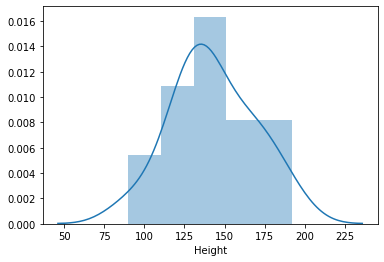

In [47]:
import seaborn as sb
sb.distplot(df.Height)

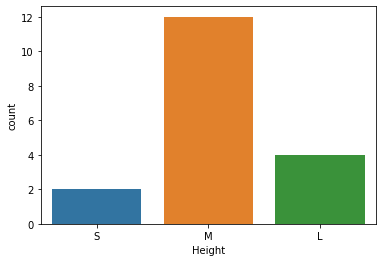

In [48]:
sb.countplot(pd.qcut(df.Height,q=[0,0.1,0.8,1],labels=['S','M','L']))

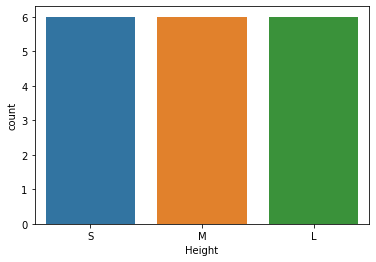

In [49]:
sb.countplot(pd.qcut(df.Height,q=[0,1/3,2/3,1],labels=['S','M','L']))

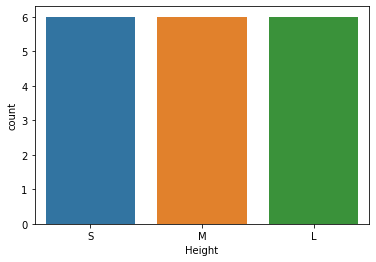

In [50]:
sb.countplot(pd.qcut(df.Height,q=3,labels=['S','M','L']))

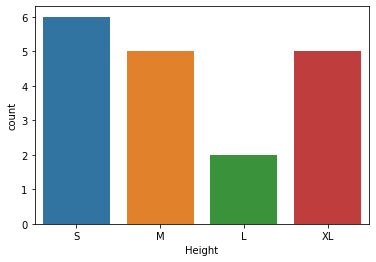

In [51]:
sb.countplot(pd.qcut(df.Height,q=4,labels=['S','M','L','XL']))

In [52]:
df.Height.describe()

count     18.000000
mean     142.805556
std       25.974401
min       90.000000
25%      128.000000
50%      139.125000
75%      161.250000
max      192.000000
Name: Height, dtype: float64

In [53]:
df.Height.value_counts()

139.125    4
128.000    2
110.000    1
120.000    1
180.000    1
167.000    1
148.000    1
175.000    1
123.000    1
162.000    1
159.000    1
90.000     1
132.000    1
192.000    1
Name: Height, dtype: int64

In [54]:
np.random.randn()

0.537610042097013

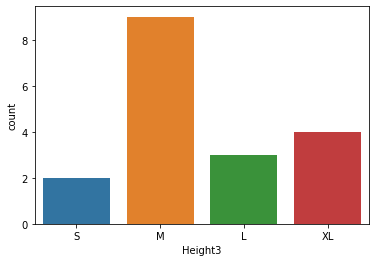

In [55]:
df['Height3']=pd.cut(df.Height,bins=4,labels=['S','M','L','XL'])
sb.countplot(df.Height3)